<a href="https://colab.research.google.com/github/HaveFaith07/Business-Project-ib-Big-data-And-AI/blob/main/BusinessProjectFakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Mitesh Patole**

**Student ID: GH1022321**

*Dataset: https://www.kaggle.com/datasets/bhavikjikadara/fake-news-detection/data*

*GitHub: https://github.com/HaveFaith07/Business-Project-ib-Big-data-And-AI*

Fake news has become a very common problem in today’s digital era also it carries huge far-reaching consequences for societies, politics, and businesses. The misinformation portrayed with fake news poses challenges to public discourse and whether people should trust the media sources or the sources of the news. There are numerous social media platforms which are accessible to the consumers. In our analysis, we aim towards addressing the problem of fake news

In [280]:
import numpy as np
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as matplt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

Here, We have Imported out Datasets We have collected our data from an open source platform named Kaggle, the title itself states Fake News Detection, We have two datasets for our analysis, two csv files ‘True.csv’ and ‘Fake.csv’, As the name itself makes it pretty much clear ‘True.csv’ file carries legitimate news, articles that have been verified as legitimate stories by credible sources, we can  identify the key differences between both contents by contrasting their characteristics also at the same time, we have ‘ Fake.csv’ carrying Fake news which has already been identified as spreading false information

In [281]:
fake_news_data = pd.read_csv('fake.csv')
true_news_data = pd.read_csv('true.csv')

We have created a column label with 2 values 1 and 0, 1 for true and 0 for False

In [282]:
true_news_data['label']=1
fake_news_data['label']=0

In [283]:
fake_news_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


To get a better idea of our datasets, and better insights we conducted Exploratory Data Analysis, wherein we have visualized the most frequent words in our both datasets ‘True.csv’ and ‘Fake.csv, for the same we have used Word Cloud Visualization, Word Cloud Visualization is a very popular technique to visualize the most frequent used words in the dataset, in Word Cloud Visualization the size of the word determines the frequency of the word used. Hence, larger the size of the word higher the frequency

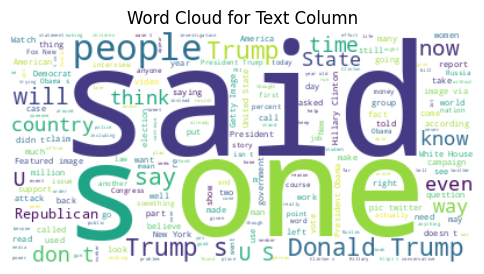

In [284]:
from wordcloud import WordCloud
text_combined = " ".join(fake_news_data['text'].dropna().tolist())
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text_combined)

matplt.figure(figsize=(6, 4))
matplt.imshow(wordcloud, interpolation='bilinear')
matplt.title('Word Cloud for Text Column')
matplt.axis('off')
matplt.show()

In [285]:
true_news_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


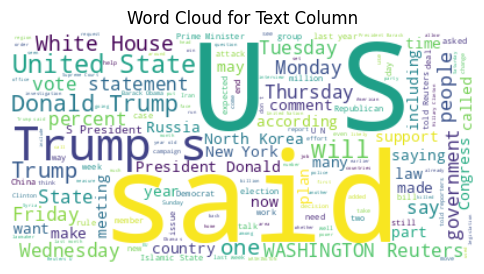

In [286]:
from wordcloud import WordCloud
text_combined = " ".join(true_news_data['text'].dropna().tolist())
wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text_combined)

matplt.figure(figsize=(6, 4))
matplt.imshow(wordcloud, interpolation='bilinear')
matplt.title('Word Cloud for Text Column')
matplt.axis('off')
matplt.show()

Here we have merged our datasets

In [287]:
news_data = pd.concat([fake_news_data, true_news_data], axis=0)
news_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


We have plotted the distribution of news based on the types of the news

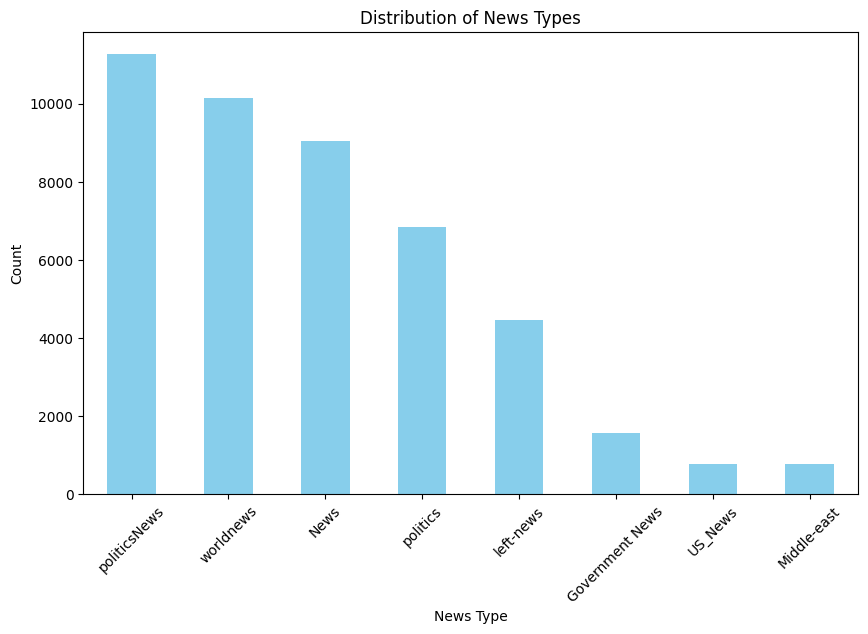

In [288]:
matplt.figure(figsize=(10, 6))
news_data['subject'].value_counts().plot(kind='bar', color='skyblue')
matplt.title('Distribution of News Types')
matplt.xlabel('News Type')
matplt.ylabel('Count')
matplt.xticks(rotation=45)
matplt.show()

Checking if there is any Null Value

In [289]:
news_data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Dropping columns as we dont need those for our model

In [290]:
news_data = news_data.drop(['title', 'subject', 'date'], axis = 1)

In [291]:
news_data.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


We Shuffle our data as when we merged we had all true followed by all False, which could have resulted in bias analysis

In [292]:

news_data = news_data.sample(frac = 1)
news_data.head()

,text,label
15456,Don t turn off your paid internet service quit...,0
9037,A Democratic Senator decided to close out 2015...,0
5544,If there s one conclusion to draw from the hor...,0
10887,"TERM LIMITS, TERM LIMITS, TERM LIMITS! Maxine ...",0
4955,WASHINGTON (Reuters) - President Donald Trump ...,1


In [293]:
news_data.reset_index(inplace=True)

In [294]:
news_data.head()

,index,text,label
0,15456,Don t turn off your paid internet service quit...,0
1,9037,A Democratic Senator decided to close out 2015...,0
2,5544,If there s one conclusion to draw from the hor...,0
3,10887,"TERM LIMITS, TERM LIMITS, TERM LIMITS! Maxine ...",0
4,4955,WASHINGTON (Reuters) - President Donald Trump ...,1


In [295]:
news_data.drop(['index'], axis = 1, inplace = True)

In [296]:
news_data.head()

,text,label
0,Don t turn off your paid internet service quit...,0
1,A Democratic Senator decided to close out 2015...,0
2,If there s one conclusion to draw from the hor...,0
3,"TERM LIMITS, TERM LIMITS, TERM LIMITS! Maxine ...",0
4,WASHINGTON (Reuters) - President Donald Trump ...,1


In [297]:
news_data.isna().sum()

text     0
label    0
dtype: int64

In [298]:
news_data.head()

,text,label
0,Don t turn off your paid internet service quit...,0
1,A Democratic Senator decided to close out 2015...,0
2,If there s one conclusion to draw from the hor...,0
3,"TERM LIMITS, TERM LIMITS, TERM LIMITS! Maxine ...",0
4,WASHINGTON (Reuters) - President Donald Trump ...,1


We have also plotted a Distribution of the type of news Fake vs True in order to understand the balance of our datasets, this allows us to understand whether the dataset is balanced and also the distribution of the results that the model are trained on.

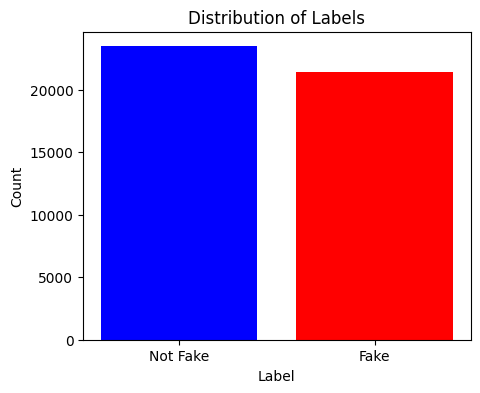

In [299]:
matplt.figure(figsize=(5, 4))
label_counts = news_data['label'].value_counts()
labels = ['Not Fake', 'Fake']
matplt.bar(range(len(label_counts)), label_counts, color=['blue', 'red'])
matplt.title('Distribution of Labels')
matplt.xlabel('Label')
matplt.ylabel('Count')
matplt.xticks(range(len(label_counts)), labels)  # Set the ticks and labels
matplt.show()

Data Preprocessing is a very crucial step in the model building, where we find unique values, missing values in the dataset, we have preprocessed our enhanced the quality of data by following preprocessing steps:

Lowercasing: We have converted all the text to lowercase to ensure the consistency of the data

Removal of URL’s: We have removed all the URLs from the text by converting it to regular expressions.

Removal of HTML Tags:  We have eliminated the HTML tags which were present in the text in our datasets.

Removal of Punctuations: We have stripped all the Punctuation marks from our dataset.

Removal of Digits: We have ensured the removal of digits from the text.

Removal of Newline character: We have ensured the replacement of the newline character with additional spaces.


In [300]:
#Feature Extraction
def wordopt(text):
  # Convert LowerCase
  text = text.lower()

  # Remove URLS
  text = re.sub(r'https?://\S+|www\.\S+','',text)

  #Remove HTML tags
  text = re.sub(r'<. *?>','', text)

  #Remove Puncts
  text = re.sub(r'[^\w\s]','', text)

  #Remove digits
  text = re.sub(r'\d','', text)

  #Remove newline characters
  text = re.sub(r'\n',' ', text)

  return text



In [301]:
news_data['text'] = news_data['text'].apply(wordopt)
news_data['text']

0        don t turn off your paid internet service quit...
1        a democratic senator decided to close out  by ...
2        if there s one conclusion to draw from the hor...
3        term limits term limits term limits maxine wat...
4        washington reuters  president donald trump pai...
                               ...                        
44893    reuters  myanmar stands accused by rights grou...
44894    so now if you enter a contest you need to worr...
44895    an officer at a cleveland school has come unde...
44896    washington reuters  us house of representative...
44897    kansas is bleeding money and jobs and governor...
Name: text, Length: 44898, dtype: object

In [302]:
x = news_data['text']
y = news_data['label']

In [303]:
x

0        don t turn off your paid internet service quit...
1        a democratic senator decided to close out  by ...
2        if there s one conclusion to draw from the hor...
3        term limits term limits term limits maxine wat...
4        washington reuters  president donald trump pai...
                               ...                        
44893    reuters  myanmar stands accused by rights grou...
44894    so now if you enter a contest you need to worr...
44895    an officer at a cleveland school has come unde...
44896    washington reuters  us house of representative...
44897    kansas is bleeding money and jobs and governor...
Name: text, Length: 44898, dtype: object

In [304]:
y

0        0
1        0
2        0
3        0
4        1
        ..
44893    1
44894    0
44895    0
44896    1
44897    0
Name: label, Length: 44898, dtype: int64

Spliitng into train test split

In [305]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)
print(x_train.shape)
print(x_test.shape)
print(news_data.shape)

(31428,)
(13470,)
(44898, 2)


We have used TF – IDF (Term Frequency – Inverse Document Frequency) Vectorization, It  is widely used in Natural Language Preprocessing (NLP) in order to convert textual data into numerical vectors. It assigns weights to words with respect to the appearance frequency of the same in the dataset. Once we have used TF- IDF to calculate each term, each value is now represented as a numerical vector which would allow our machine learning algorithm to accept and operate on the textual data, as machine usually operate on numerical values. It is an effective technique as it rectifies the importance of the terms in the data at the same time also considering the rarity throughout the dataset. By using this we can train our machine learning algorithm to differ between fake and true news

In [306]:
#Convert text into Numerical data TFIDF Vectorizer,will crate vectors
mod_vect = TfidfVectorizer()
vect_train = mod_vect.fit_transform(x_train)
vect_test = mod_vect.transform(x_test)

In [307]:
vect_train

<31428x176484 sparse matrix of type '<class 'numpy.float64'>'
	with 6456931 stored elements in Compressed Sparse Row format>

In [308]:
vect_test

<13470x176484 sparse matrix of type '<class 'numpy.float64'>'
	with 2726248 stored elements in Compressed Sparse Row format>

Random Forest comes from the ensemble learning branch which constructs multiple decision trees which outputs the classification model of classes and predicts average of individual trees, it also manages to avoid overfitting problems and is also capable in handling large datasets, Random Forest is suitable for text classification tasks as it has the ability to capture complex relationship between features.



In [309]:
model_ranfor = sklearn.ensemble.RandomForestClassifier()
model_ranfor.fit(vect_train,y_train)

RandomForestClassifier()

In [310]:
predict_model_ranfor = model_ranfor.predict(vect_test)
model_ranfor.score(vect_test, y_test)

0.991833704528582

In [311]:
print(classification_report(y_test, predict_model_ranfor))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7033
           1       0.99      0.99      0.99      6437

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Logistic Regression is a linear model used for binary classification, it is very effective and is considered as a baseline model for comparison. It is mainly used for classification tasks and has influence of each feature on the predicted probability.

In [312]:
model_lr = LogisticRegression()
model_lr.fit(vect_train,y_train)

LogisticRegression()

In [313]:
predict_model_lr = model_lr.predict(vect_test)
model_lr.score(vect_test, y_test)

0.9890126206384559

In [314]:
print(classification_report(y_test, predict_model_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7033
           1       0.99      0.99      0.99      6437

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Decision Tree Classifier is a non-parametric supervised machine learning algorithms that partitions the data into regions and makes appropriate predictions based on the classes, it is also easy to interpret, which makes it easy to understand and is very helpful in decision making processes, but comes with a downside with overfitting issues.

In [315]:
model_dt = DecisionTreeClassifier()
model_dt.fit(vect_train, y_train)

DecisionTreeClassifier()

In [316]:
predict_model_dt = model_dt.predict(vect_test)
model_dt.score(vect_test, y_test)

0.996362286562732

In [317]:
print(classification_report(y_test, predict_model_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7033
           1       1.00      1.00      1.00      6437

    accuracy                           1.00     13470
   macro avg       1.00      1.00      1.00     13470
weighted avg       1.00      1.00      1.00     13470



Gradient Boosting also comes from ensemble learning family with a learning focus on the mistake previously made by the subsequent learner, it is also known for its high accuracy and its ability to handle data it combines the strengths of weak leaners and predicts a strong productive model.

In [318]:
model_gb = GradientBoostingClassifier()
model_gb.fit(vect_train, y_train)

GradientBoostingClassifier()

In [319]:
predict_model_gb = model_gb.predict(vect_test)
model_gb.score(vect_test, y_test)

0.9948032665181886

In [320]:
print(classification_report(y_test, predict_model_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7033
           1       0.99      1.00      0.99      6437

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



Conclusion:
Our Fake news data presents a challenge in today’s digital era, it significantly impacts the public disclosure, which result into questioning the trust in social media, and it also results into influential decision-making processes, we as data scientists have managed to extract and develop effective model for detecting and mitigating fake news. Our analysis targets organizations executives, managers and decision makers as well as stakeholders which are involved in strategic planning and operations, we have conducted a thorough examinations of various aspects which are relevant to company’s goals and objectives, we have embrace the power to make informed decisions which are backed by data driven insights which ultimately has a big competitive advantage.
